In [76]:
import pandas as pd 

wine = pd.read_csv('./datasets/winequality-red.csv', delimiter=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [77]:
wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [78]:
df = wine.copy()

In [79]:
def c(x):
    if x >= 6:
        return 1
    else:
        return 0

In [80]:
df['target'] = df['quality'].apply(lambda x: 1 if x>=6 else 0)

In [81]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [82]:
df = df.drop(['quality'], axis = 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


* 이진 분류로 데이터 정리

## 스케일링

In [83]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape, y.shape

((1599, 11), (1599,))

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2022, stratify=y, shuffle = True)

In [85]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)

In [86]:
import numpy as np

y_train = y_train.values
y_train.shape

(1199,)

## 학습

In [87]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
X_test = ss.transform(X_test)
y_test = y_test.values

In [89]:
X_test, y_test

(array([[ 0.65737079, -0.86395459,  1.26150772, ..., -0.84722896,
         -0.8532026 , -0.8776068 ],
        [-0.78103271, -0.14826261, -0.67765607, ...,  1.40658804,
         -0.28452735, -0.0320609 ],
        [ 1.63548518, -1.35943364,  1.46563023, ..., -0.9760185 ,
         -0.45512992, -0.59575817],
        ...,
        [-0.72349657, -1.68975302,  1.10841584, ...,  0.50506124,
         -0.56886498,  1.84692998],
        [ 0.65737079,  0.34721644,  0.85326271, ...,  0.95582464,
         -0.17079229, -0.8776068 ],
        [-0.43581587,  1.14548826, -1.29002359, ...,  1.2777985 ,
          0.28414791,  1.18928317]]),
 array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
   

In [90]:
y_test.shape

(400,)

In [91]:
y_pred = dt.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.705

In [93]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[135,  51],
       [ 67, 147]], dtype=int64)

In [94]:
from sklearn.tree import plot_tree 

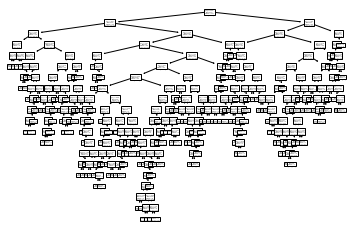

In [96]:
import matplotlib.pyplot as plt 
plot_tree(dt)
plt.show()

* ?!

In [104]:
from sklearn.model_selection import GridSearchCV

param = {
    'max_depth': range(1,10),
    'min_samples_split' : range(2,50),
    'min_samples_leaf' : range(10,50)
}

gs = GridSearchCV(dt, param, refit=True)
gs.fit(X_train, y_train)
gs.best_score_

0.7314783821478382

In [106]:
from sklearn import svm
param = {
    'C':range(1,100),
    'gamma':[0.001,0.005, 0.01, 0.05, 0.1, 0.5, 1],
    'kernel':['rbf']
}
#위의 모든 경우의 수를 다 돌려 볼 것
model = svm.SVC()
grid = GridSearchCV(model, param, refit=True)
grid.fit(X_train, y_train)
grid.best_score_

0.7739609483960948

* Decision Tree vs SVM

In [112]:
dt.feature_importances_

array([0.05203445, 0.14585427, 0.05711137, 0.03906063, 0.09894191,
       0.03472655, 0.08732726, 0.01541735, 0.07879844, 0.14913799,
       0.24158978])

In [115]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [120]:
for name, value in zip(X.columns, dt.feature_importances_):
    print(name, value)

fixed acidity 0.05203444933789858
volatile acidity 0.14585426536320048
citric acid 0.05711137085906186
residual sugar 0.03906063009298422
chlorides 0.09894191368023707
free sulfur dioxide 0.03472654665457375
total sulfur dioxide 0.08732725902866685
density 0.01541735419203422
pH 0.07879843822413996
sulphates 0.14913799145039897
alcohol 0.24158978111680407


In [122]:
sr = pd.Series(dt.feature_importances_, index=X.columns)
sr

fixed acidity           0.052034
volatile acidity        0.145854
citric acid             0.057111
residual sugar          0.039061
chlorides               0.098942
free sulfur dioxide     0.034727
total sulfur dioxide    0.087327
density                 0.015417
pH                      0.078798
sulphates               0.149138
alcohol                 0.241590
dtype: float64

* Series 로 만들기

In [126]:
sr = sr.sort_values(ascending=False)
sr

alcohol                 0.241590
sulphates               0.149138
volatile acidity        0.145854
chlorides               0.098942
total sulfur dioxide    0.087327
pH                      0.078798
citric acid             0.057111
fixed acidity           0.052034
residual sugar          0.039061
free sulfur dioxide     0.034727
density                 0.015417
dtype: float64

* 정렬을 통해 중요도 판단
* 중요도를 보고 데이터를 없애고 더 좋은 결과를 기대할 수 있음

<AxesSubplot:>

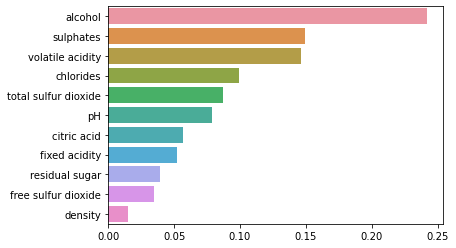

In [127]:
import seaborn as sns
sns.barplot(x=sr, y=sr.index)

* Decision Tree는 col의 중요도를 쉽게 알 수 있는 장점이 있다 

In [129]:
dt

DecisionTreeClassifier()

## File Dump
---
* Best trained Model을 가지고 있다면 전달해야함 
* 현재 Model은 Memory 상에 있기 때문에 이것을 Dump하여야 함.
* pickle(파이썬 객체 직렬화) 모듈을 통해 시리얼라이즈, 파일화

In [130]:
!python --version

Python 3.8.0


In [131]:
import pickle

# 내 메모리에 올라가있는 그 모습 그대로 가져오기
pickle.dump(dt, open('my_dt_wine.pkl', 'wb'), protocol = 4)
pickle.dump(grid, open('my_grid_wine.pkl', 'wb'), protocol = 4)

* 이 파일을 문서와 함께 전달해주면 됌

## 로딩
---

In [133]:
my_dt = pickle.load(open('my_dt_wine.pkl', 'rb'))

In [134]:
my_dt.predict(X_test)

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,

* 가져온 모델은 곧바로 예측에 사용할 수 있음
* 이것을 웹 서비스로 올려서 사용

# Random Forest 
---

In [135]:
X_train.shape, y_train.shape

((1199, 11), (1199,))

In [136]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()


In [137]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [138]:
y_pred = rfc.predict(X_test)

In [139]:
accuracy_score(y_test, y_pred)

0.8375

In [141]:
pram = {
    'n_estimater' : range(50,200,10),
    'max_depth': range(5,10),
    'min_sample_leaf': range(5,20)
}

In [142]:
grid = GridSearchCV(model, param, refit=True)
grid.fit(X_train, y_train)
grid.best_score_

0.7739609483960948

In [ ]:
pickle.dump(grid, open('my_grid_wine.pkl', 'wb'), protocol = 4)